# Data Wrangling

In [34]:
!pip install catboost 

In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


In [2]:
#Load the pickle file
df = pkl.load(open('bank_data.pkl', 'rb'))
df.columns=['id','dates','transaction_amount','days_before_request','loan_amount','loan_date','isDefault']

In [3]:
df['id'] = df['id'].apply(lambda x: x[1])
df['dates'] = df['dates'].apply(lambda x: x[1])
df['transaction_amount'] = df['transaction_amount'].apply(lambda x: x[1])
df['days_before_request'] = df['days_before_request'].apply(lambda x: x[1])
df['loan_amount'] = df['loan_amount'].apply(lambda x: x[1])
df['loan_date'] = df['loan_date'].apply(lambda x: x[1])
df.head()

,id,dates,transaction_amount,days_before_request,loan_amount,loan_date,isDefault
0,00076211-9BBD-4E06-82C2-E9FB7B102964-750,"[2017-05-19, 2017-05-29, 2017-05-31, 2017-06-0...","[[-60.0], [0.02], [0.01], [60.0], [-60.0], [60...","[[79.0], [79.0], [76.0], [76.0], [76.0], [76.0...",750,2017-08-16,"[isDefault, 1]"
1,0009107F-8F57-441C-A590-5773992261A9-500,"[2017-11-20, 2017-11-20, 2017-11-20, 2017-11-2...","[[-68.93], [-23.7], [-0.5], [-63.9], [-1.57], ...","[[12.0], [12.0], [12.0], [12.0], [12.0], [12.0...",500,2018-02-17,"[isDefault, 1]"
2,000B47CB-514F-446C-B7BE-2F2D304E2F4D-1000,"[2017-05-29, 2017-05-29, 2017-05-29, 2017-05-2...","[[-23.5], [-9.78], [-14.25], [-75.01], [-20.0]...","[[87.0], [87.0], [87.0], [87.0], [86.0], [86.0...",1000,2017-08-25,"[isDefault, 0]"
3,000CAC25-AFBD-455D-9367-D23FB38D17B0-250,"[2017-08-17, 2017-08-17, 2017-08-17, 2017-08-1...","[[-360.0], [105.82], [192.79], [-62.25], [-40....","[[88.0], [88.0], [88.0], [88.0], [88.0], [88.0...",250,2017-11-12,"[isDefault, 0]"
4,000E9C38-708E-40F7-8ABC-9DF55B77BB54-500,"[2016-08-29, 2016-08-29, 2016-08-29, 2016-08-2...","[[-2.16], [-4.96], [-17.49], [-10.0], [-1.5], ...","[[88.0], [88.0], [87.0], [87.0], [87.0], [87.0...",500,2016-11-25,"[isDefault, 0]"


# Getting training dataset

In [4]:
#changed dataframe value
train_df=df
train_df.head()

,id,dates,transaction_amount,days_before_request,loan_amount,loan_date,isDefault
0,00076211-9BBD-4E06-82C2-E9FB7B102964-750,"[2017-05-19, 2017-05-29, 2017-05-31, 2017-06-0...","[[-60.0], [0.02], [0.01], [60.0], [-60.0], [60...","[[79.0], [79.0], [76.0], [76.0], [76.0], [76.0...",750,2017-08-16,"[isDefault, 1]"
1,0009107F-8F57-441C-A590-5773992261A9-500,"[2017-11-20, 2017-11-20, 2017-11-20, 2017-11-2...","[[-68.93], [-23.7], [-0.5], [-63.9], [-1.57], ...","[[12.0], [12.0], [12.0], [12.0], [12.0], [12.0...",500,2018-02-17,"[isDefault, 1]"
2,000B47CB-514F-446C-B7BE-2F2D304E2F4D-1000,"[2017-05-29, 2017-05-29, 2017-05-29, 2017-05-2...","[[-23.5], [-9.78], [-14.25], [-75.01], [-20.0]...","[[87.0], [87.0], [87.0], [87.0], [86.0], [86.0...",1000,2017-08-25,"[isDefault, 0]"
3,000CAC25-AFBD-455D-9367-D23FB38D17B0-250,"[2017-08-17, 2017-08-17, 2017-08-17, 2017-08-1...","[[-360.0], [105.82], [192.79], [-62.25], [-40....","[[88.0], [88.0], [88.0], [88.0], [88.0], [88.0...",250,2017-11-12,"[isDefault, 0]"
4,000E9C38-708E-40F7-8ABC-9DF55B77BB54-500,"[2016-08-29, 2016-08-29, 2016-08-29, 2016-08-2...","[[-2.16], [-4.96], [-17.49], [-10.0], [-1.5], ...","[[88.0], [88.0], [87.0], [87.0], [87.0], [87.0...",500,2016-11-25,"[isDefault, 0]"


In [5]:
train_df['isDefault'] = train_df['isDefault'].apply(lambda x: x[1] if len(x)>0 else "")
train_df.head()

,id,dates,transaction_amount,days_before_request,loan_amount,loan_date,isDefault
0,00076211-9BBD-4E06-82C2-E9FB7B102964-750,"[2017-05-19, 2017-05-29, 2017-05-31, 2017-06-0...","[[-60.0], [0.02], [0.01], [60.0], [-60.0], [60...","[[79.0], [79.0], [76.0], [76.0], [76.0], [76.0...",750,2017-08-16,1
1,0009107F-8F57-441C-A590-5773992261A9-500,"[2017-11-20, 2017-11-20, 2017-11-20, 2017-11-2...","[[-68.93], [-23.7], [-0.5], [-63.9], [-1.57], ...","[[12.0], [12.0], [12.0], [12.0], [12.0], [12.0...",500,2018-02-17,1
2,000B47CB-514F-446C-B7BE-2F2D304E2F4D-1000,"[2017-05-29, 2017-05-29, 2017-05-29, 2017-05-2...","[[-23.5], [-9.78], [-14.25], [-75.01], [-20.0]...","[[87.0], [87.0], [87.0], [87.0], [86.0], [86.0...",1000,2017-08-25,0
3,000CAC25-AFBD-455D-9367-D23FB38D17B0-250,"[2017-08-17, 2017-08-17, 2017-08-17, 2017-08-1...","[[-360.0], [105.82], [192.79], [-62.25], [-40....","[[88.0], [88.0], [88.0], [88.0], [88.0], [88.0...",250,2017-11-12,0
4,000E9C38-708E-40F7-8ABC-9DF55B77BB54-500,"[2016-08-29, 2016-08-29, 2016-08-29, 2016-08-2...","[[-2.16], [-4.96], [-17.49], [-10.0], [-1.5], ...","[[88.0], [88.0], [87.0], [87.0], [87.0], [87.0...",500,2016-11-25,0


In [6]:
train_df.tail()

,id,dates,transaction_amount,days_before_request,loan_amount,loan_date,isDefault
14995,FFEA064F-0D58-4CB8-A42F-F54E90EC0816-1000,"[2017-04-17, 2017-04-20, 2017-04-27, 2017-04-2...","[[-150.0], [6.52], [6.52], [150.0], [3.9], [-3...","[[62.0], [62.0], [62.0], [62.0], [62.0], [61.0...",1000,2017-07-12,
14996,FFEADE25-11CF-488D-B722-EDF6649A3F52-750,"[2017-03-07, 2017-03-08, 2017-03-08, 2017-03-0...","[[350.0], [-23.21], [-48.27], [100.0], [-158.0...","[[18.0], [18.0], [18.0], [18.0], [18.0], [18.0...",750,2017-06-02,
14997,FFEC371F-8F61-469D-8B9B-360504AB803A-750,"[2017-08-21, 2017-08-23, 2017-08-23, 2017-08-2...","[[-108.09], [-10.0], [-120.0], [-159.54], [-12...","[[75.0], [74.0], [74.0], [74.0], [74.0], [74.0...",750,2017-11-16,
14998,FFF1961C-9082-4EC1-AEAF-0DACD21EF80A-500,"[2017-05-16, 2017-05-17, 2017-05-18, 2017-05-1...","[[-10.0], [6.03], [-4.2], [-143.0], [-0.5], [1...","[[66.0], [66.0], [66.0], [66.0], [65.0], [65.0...",500,2017-08-13,
14999,FFF4FB79-70EA-4E28-9A7A-572BE7E75D42-500,"[2017-02-09, 2017-02-09, 2017-02-09, 2017-02-0...","[[-8.58], [-40.0], [40.0], [-174.48], [-30.0],...","[[20.0], [19.0], [19.0], [19.0], [19.0], [19.0...",500,2017-05-09,


In [7]:
def get_average_withdrawal_per_month(transaction_amount_list, dates_list):
    try:
        # sum agrregate transaction amount by month, year
        transaction_amount_by_month_year = {}
        for i in range(len(transaction_amount_list)):
            date = dates_list[i]
            month_year = date[:7]
            if month_year not in transaction_amount_by_month_year:
                transaction_amount_by_month_year[month_year] = 0
            transaction_amount_by_month_year[month_year] += transaction_amount_list[i]
    # get average
        average = 0
        for month_year in transaction_amount_by_month_year:
            average += transaction_amount_by_month_year[month_year]
        average /= len(transaction_amount_by_month_year)
        return average
    except ZeroDivisionError:
        return 0


In [8]:
def get_rate_withdrawal(transactions,dates):
    date_ranges = []
    for i in range(len(transactions)-1):
        date = dates[i]
        nxt_date = dates[i+1]

        date = datetime.strptime(date, "%Y-%m-%d")
        nxt_date = datetime.strptime(nxt_date, "%Y-%m-%d")

        date_diff = nxt_date-date
        date_ranges.append(date_diff)


    rate_of_withdrawal = sum(date_ranges,timedelta()).days/len(date_ranges)
    return rate_of_withdrawal


In [9]:
train_df['Balance'] = train_df['transaction_amount'].apply(lambda x: sum(x))
train_df['Balance'] = train_df['Balance'].apply(lambda x: x[0])
train_df['frequency'] = train_df['transaction_amount'].apply(lambda x: len(x))
train_df['frequency_debit'] = train_df['transaction_amount'].apply(lambda x: len([x < 0]))
train_df['frequency_credit'] = train_df['transaction_amount'].apply(lambda x: len([x > 0]))
train_df['debit'] = train_df['transaction_amount'].apply(lambda x: x[x < 0].sum())
train_df['mean_trans'] = train_df['transaction_amount'].apply(lambda x: x.mean())
train_df['median_trans'] = train_df['transaction_amount'].apply(lambda x: np.median(x))
train_df['credit'] = train_df['transaction_amount'].apply(lambda x: x[x > 0].sum())
train_df['loan_date']= train_df['loan_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
train_df['Recency'] = train_df['dates'].apply(lambda x: (datetime.strptime(max(x), '%Y-%m-%d')))
train_df['Recency'] = train_df['loan_date']-train_df['Recency']
train_df['Recency'] = train_df['Recency'].dt.days
train_df['average_balance_per_month'] = train_df.apply(lambda x: get_average_withdrawal_per_month(x['transaction_amount'], x['dates']), axis=1)
train_df['average_balance_per_month'] = train_df['average_balance_per_month'].apply(lambda x: x[0])

train_df['average_debit_per_month'] = train_df.apply(lambda x: get_average_withdrawal_per_month(x['transaction_amount'][x['transaction_amount']<0], x['dates']), axis=1)
train_df['average_credit_per_month'] = train_df.apply(lambda x: get_average_withdrawal_per_month(x['transaction_amount'][x['transaction_amount']>0], x['dates']), axis=1)

train_df['recent_deposit'] = train_df['transaction_amount'].apply(lambda x: x[x > 0][-1] if len(x[x > 0]) > 0 else 0)
train_df['recent_withdrawal'] = train_df['transaction_amount'].apply(lambda x: x[x < 0][-1] if len(x[x < 0]) > 0 else 0)
train_df['rate_withdrawal'] = train_df.apply(lambda x: get_rate_withdrawal(x['transaction_amount'][x['transaction_amount']<0], x['dates']), axis=1)

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# frequency of positive transaction_amounts happening in the first half of the month
def get_frequency_of_positive_transaction_amounts_in_first_half_of_month(dates_list, transaction_amount_list):
    count = 0
    for i in range(len(dates_list)):
        if int(dates_list[i][8:]) <= 15 and transaction_amount_list[i] > 0:
            count += 1
    return count / len(dates_list)

train_df['frequency_of_positive_transaction_amounts_in_first_half_of_month'] = train_df.apply(lambda x: get_frequency_of_positive_transaction_amounts_in_first_half_of_month(x['dates'], x['transaction_amount']), axis=1)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#frequency of negative transaction_amounts happening in the second half of the month
def get_frequency_of_negative_transaction_amounts_in_second_half_of_month(dates_list, transaction_amount_list):
    count = 0
    for i in range(len(dates_list)):
        if int(dates_list[i][8:]) > 15 and transaction_amount_list[i] < 0:
            count += 1
    return count / len(dates_list)

train_df['frequency_of_negative_transaction_amounts_in_second_half_of_month'] = train_df.apply(lambda x: get_frequency_of_negative_transaction_amounts_in_second_half_of_month(x['dates'], x['transaction_amount']), axis=1)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# frequency of positive transaction_amounts happening in the second half of the month
def get_frequency_of_positive_transaction_amounts_in_second_half_of_month(dates_list, transaction_amount_list):
    count = 0
    for i in range(len(dates_list)):
        if int(dates_list[i][8:]) > 15 and transaction_amount_list[i] > 0:
            count += 1
    return count / len(dates_list)

train_df['frequency_of_positive_transaction_amounts_in_second_half_of_month'] = train_df.apply(lambda x: get_frequency_of_positive_transaction_amounts_in_second_half_of_month(x['dates'], x['transaction_amount']), axis=1)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# frequency of negative transaction_amounts happening in the first half of the month
def get_frequency_of_negative_transaction_amounts_in_first_half_of_month(dates_list, transaction_amount_list):
    count = 0
    for i in range(len(dates_list)):
        if int(dates_list[i][8:]) <= 15 and transaction_amount_list[i] < 0:
            count += 1
    return count / len(dates_list)

train_df['frequency_of_negative_transaction_amounts_in_first_half_of_month'] = train_df.apply(lambda x: get_frequency_of_negative_transaction_amounts_in_first_half_of_month(x['dates'], x['transaction_amount']), axis=1)


In [10]:
temp_cols=train_df.columns.tolist()
index=train_df.columns.get_loc("isDefault")
new_cols= temp_cols[0:index] + temp_cols[index+1:] + temp_cols[index:index+1]
train_df=train_df[new_cols]
train_df.head()


,id,dates,transaction_amount,days_before_request,loan_amount,loan_date,Balance,frequency,frequency_debit,frequency_credit,...,average_debit_per_month,average_credit_per_month,recent_deposit,recent_withdrawal,rate_withdrawal,frequency_of_positive_transaction_amounts_in_first_half_of_month,frequency_of_negative_transaction_amounts_in_second_half_of_month,frequency_of_positive_transaction_amounts_in_second_half_of_month,frequency_of_negative_transaction_amounts_in_first_half_of_month,isDefault
0,00076211-9BBD-4E06-82C2-E9FB7B102964-750,"[2017-05-19, 2017-05-29, 2017-05-31, 2017-06-0...","[[-60.0], [0.02], [0.01], [60.0], [-60.0], [60...","[[79.0], [79.0], [76.0], [76.0], [76.0], [76.0...",750,2017-08-16,-711.48,200,1,1,...,-3368.270000,6380.800,60.00,-18.62,0.488235,0.060000,0.475000,0.085000,0.380000,1
1,0009107F-8F57-441C-A590-5773992261A9-500,"[2017-11-20, 2017-11-20, 2017-11-20, 2017-11-2...","[[-68.93], [-23.7], [-0.5], [-63.9], [-1.57], ...","[[12.0], [12.0], [12.0], [12.0], [12.0], [12.0...",500,2018-02-17,911.98,382,1,1,...,-5635.003333,8908.495,550.00,-2.43,0.252669,0.112565,0.371728,0.149215,0.366492,1
2,000B47CB-514F-446C-B7BE-2F2D304E2F4D-1000,"[2017-05-29, 2017-05-29, 2017-05-29, 2017-05-2...","[[-23.5], [-9.78], [-14.25], [-75.01], [-20.0]...","[[87.0], [87.0], [87.0], [87.0], [86.0], [86.0...",1000,2017-08-25,366.63,236,1,1,...,-3132.892500,12898.200,487.61,-23.00,0.380090,0.025424,0.567797,0.033898,0.372881,0
3,000CAC25-AFBD-455D-9367-D23FB38D17B0-250,"[2017-08-17, 2017-08-17, 2017-08-17, 2017-08-1...","[[-360.0], [105.82], [192.79], [-62.25], [-40....","[[88.0], [88.0], [88.0], [88.0], [88.0], [88.0...",250,2017-11-12,332.54,249,1,1,...,-3122.990000,4850.755,982.44,-72.87,0.371859,0.072289,0.453815,0.124498,0.349398,0
4,000E9C38-708E-40F7-8ABC-9DF55B77BB54-500,"[2016-08-29, 2016-08-29, 2016-08-29, 2016-08-2...","[[-2.16], [-4.96], [-17.49], [-10.0], [-1.5], ...","[[88.0], [88.0], [87.0], [87.0], [87.0], [87.0...",500,2016-11-25,-285.56,240,1,1,...,-1292.282500,2441.785,215.00,-4.66,0.376106,0.020833,0.500000,0.033333,0.445833,0


# Model Fitting

### Preparing Data

In [26]:
print(*train_df.columns, sep="\n")

id
dates
transaction_amount
days_before_request
loan_amount
loan_date
Balance
frequency
frequency_debit
frequency_credit
debit
mean_trans
median_trans
credit
Recency
average_balance_per_month
average_debit_per_month
average_credit_per_month
recent_deposit
recent_withdrawal
rate_withdrawal
frequency_of_positive_transaction_amounts_in_first_half_of_month
frequency_of_negative_transaction_amounts_in_second_half_of_month
frequency_of_positive_transaction_amounts_in_second_half_of_month
frequency_of_negative_transaction_amounts_in_first_half_of_month
isDefault


In [11]:
# Separate the ID column and the target column
ids = train_df[train_df['isDefault'] == ""].id
y_final = train_df['isDefault']

train_data = train_df.drop(['id','dates','transaction_amount','days_before_request','loan_date','frequency_debit','frequency_credit'], axis=1)


In [12]:
# Define X and y
y = train_data["isDefault"]

#cols = [col for col in df_features.columns if col not in customer_id]
X = train_data[train_data.columns[:-1]]

In [13]:

X_train = X[y != ""]
y_train = y[y != ""].astype("int")
X_test = X[y == ""]
y_test = y[y == ""]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [15]:
print("%s --> %d" % ("X_train", len(X_train)))
print("%s --> %d" % ("y_train", len(y_train)))
print("%s --> %d" % ("X_valid", len(X_valid)))
print("%s --> %d" % ("y_valid", len(y_valid)))
print("%s --> %d" % ("X_test", len(X_test)))
print("%s --> %d" % ("y_test", len(y_test)))


X_train --> 6800
y_train --> 6800
X_valid --> 1201
y_valid --> 1201
X_test --> 6999
y_test --> 6999


### Cat Boost

In [60]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 736.8 kB/s eta 0:00:0031m26.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 2.1 MB/s eta 0:00:00m eta 0:00:010:00:01


In [16]:
from catboost import CatBoostClassifier

# Define the CatBoost classifier
cat_clf = CatBoostClassifier(loss_function='Logloss', depth=4, l2_leaf_reg=1, learning_rate=0.01, eval_metric='AUC', verbose=False)

cat_clf.fit(X_train, y_train)

print("Best ROC AUC score: ", cat_clf.best_score_)


Best ROC AUC score:  {'learn': {'Logloss': 0.47776611328125}}


In [17]:
scores = cat_clf.predict(X_valid)
print("Best Score", accuracy_score(y_valid, scores))

NameError: name 'accuracy_score' is not defined

In [30]:
# Checking Feature Importance



# Get the feature importance scores
feature_importance = cat_clf.get_feature_importance()

# Print the feature importance scores
for feature, importance in zip(X.columns, feature_importance):
    print(feature, importance)

loan_amount 18.42989227489813
Balance 1.7782112691448835
frequency 3.9935596077022804
debit 1.9343182136141235
mean_trans 1.7992667185271278
median_trans 4.334926706400578
credit 1.5022586943178051
Recency 37.19448895258746
average_balance_per_month 1.392428331031369
average_debit_per_month 1.7914687010897865
average_credit_per_month 1.4705214775401034
recent_deposit 2.863542695602094
recent_withdrawal 2.811933872072953
rate_withdrawal 4.224866615206327
frequency_of_positive_transaction_amounts_in_first_half_of_month 3.9878414620296523
frequency_of_negative_transaction_amounts_in_second_half_of_month 2.8323293061301973
frequency_of_positive_transaction_amounts_in_second_half_of_month 4.564173042603619
frequency_of_negative_transaction_amounts_in_first_half_of_month 3.093972059501502


AUC: 0.700


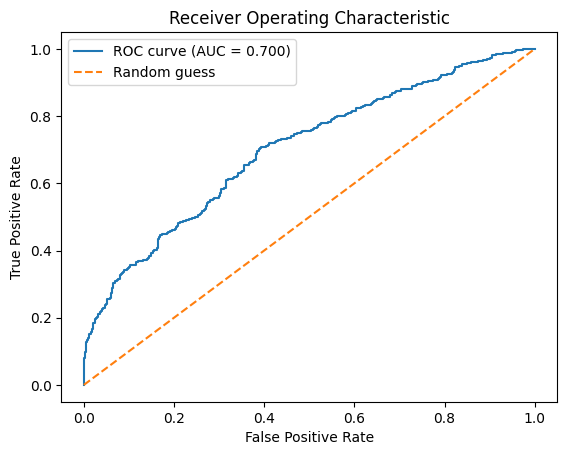

In [18]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# predict probabilities for the test data
y_proba = cat_clf.predict_proba(X_valid)[:, 1]

# calculate the AUC score
auc = roc_auc_score(y_valid, y_proba)
print("AUC: {:.3f}".format(auc))

# calculate the false positive rate and true positive rate for the ROC curve
fpr, tpr, _ = roc_curve(y_valid, y_proba)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.3f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()


# Dump File

In [19]:
# Dump File

y_pred = cat_clf.predict_proba(X_test)[:, 1]

# Combine the ID and predicted values into a DataFrame
output_df = pd.DataFrame({'id': ids, 'predicted_target': y_pred})

# Dump the DataFrame into a CSV file
output_df.to_csv('output.csv', index=False)
